# 02 - Simple Liner Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">


In [1]:
import tensorflow as tf
import numpy as np

# Hypothesis and Cost
### Hypothesis 
$$ H(x) = Wx + b $$


### Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

* Which Hypothesis is better ?
* cost function: 편차제곱의 평균
* learning의 목표는 cost(W,b)를 최소화하는 (W,b)를 구하는 것


In [60]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# (W=1, b=0 가 되어야 한다는 것은 미리 알고 있다) 
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

hypothesis = W * x_data + b
f'W-{tf.print(W)}, b-{tf.print(b)}, hypothesis-{tf.print(hypothesis)}'

[0.392063856]
[-0.443515062]
[-0.0514512062 0.34061265 0.732676506]


'W-None, b-None, hypothesis-None'

In [61]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
# 차원이 줄어들면서 mean 값을 구한다 그래서 "reduce"가 붙는다.
tf.print(cost)

2.99995732


## Gradient descent

* 보통 GradientTape 은 with 구문과 같이 구한다. 
1. with 구문 안에 변수들의 변화를 tape에 기록한다
2. gradient method를 호출해 cost 함수에 대한 W 기울기, b 기울기를 tuple로 반환한다.
3. update 한다
4. 이를 여러번 수행한다.

<div>
    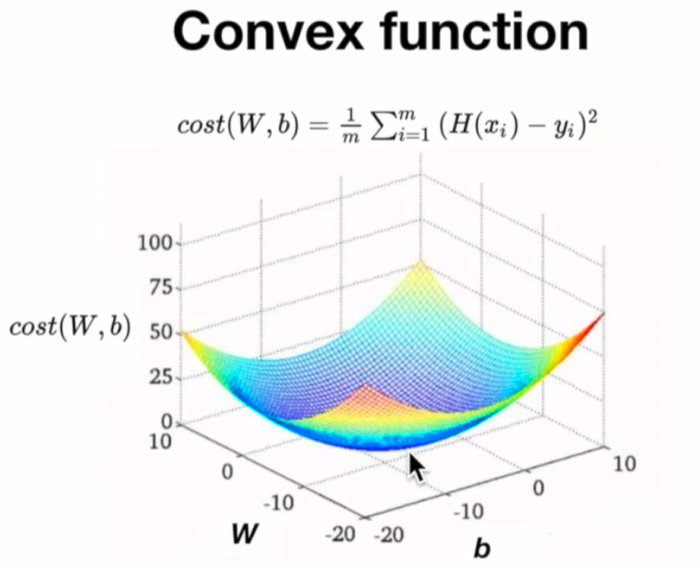
</div>

In [62]:
learning_rate = 0.02
for i in range(1000):
    #gradient tape
    with tf.GradientTape() as tape: 
        hypothesis = W * x_data + b
        # 함수 정의
        cost = tf.reduce_mean(tf.square(hypothesis - y_data)) 
    #미분값 가져오기
    W_grad, b_grad = tape.gradient(cost, [W, b]) 
    #update
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 100 == 0 :
        print('{:5}|{:10.4f}|{:10.4f}|{:10.6f}'.format(i, W.numpy()[0], b.numpy()[0], cost))

    0|    0.5410|   -0.3771|  2.999957
  100|    1.0399|   -0.0907|  0.001191
  200|    1.0246|   -0.0560|  0.000454
  300|    1.0152|   -0.0346|  0.000173
  400|    1.0094|   -0.0214|  0.000066
  500|    1.0058|   -0.0132|  0.000025
  600|    1.0036|   -0.0081|  0.000010
  700|    1.0022|   -0.0050|  0.000004
  800|    1.0014|   -0.0031|  0.000001
  900|    1.0008|   -0.0019|  0.000001


In [20]:
a = tf.Variable(0.1)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(a) # v2.0 으로 바꿈
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.initializers.global_variables())

for step in range(1000):
    sess.run(train)
    if step % 30 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

# placeholder

In [2]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

a = tf.Variable(0.1) 
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.initializers.global_variables())

for step in range(1000):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 30 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

0 0.23415472 [0.74881464] [0.94065374]
30 0.025842478 [0.81329197] [0.4244312]
60 0.006001683 [0.91002274] [0.20453936]
90 0.0013938443 [0.9566387] [0.09857045]
120 0.00032370738 [0.97910357] [0.04750248]
150 7.5177835e-05 [0.9899297] [0.02289217]
180 1.7459637e-05 [0.995147] [0.01103208]
210 4.0546915e-06 [0.9976613] [0.00531649]
240 9.417765e-07 [0.99887294] [0.00256211]
270 2.1865871e-07 [0.9994569] [0.00123471]
300 5.0772787e-08 [0.9997383] [0.00059503]
330 1.1799879e-08 [0.9998739] [0.0002868]
360 2.7365417e-09 [0.9999392] [0.00013821]
390 6.3606365e-10 [0.99997073] [6.660059e-05]
420 1.4789237e-10 [0.9999859] [3.210142e-05]
450 3.4811858e-11 [0.9999932] [1.548364e-05]
480 8.000711e-12 [0.9999967] [7.480722e-06]
510 1.9184654e-12 [0.9999984] [3.5944997e-06]
540 4.92643e-13 [0.9999992] [1.734835e-06]
570 9.473903e-14 [0.9999996] [8.526869e-07]
600 6.158037e-14 [0.9999997] [5.98374e-07]
630 3.7895614e-14 [0.99999994] [2.7253517e-07]
660 0.0 [1.] [5.7958374e-08]
690 0.0 [1.] [5.79583

In [3]:
print(sess.run(hypothesis, feed_dict={X: 5}))
print(sess.run(hypothesis, feed_dict={X: 2.5}))

[5.]
[2.5]
